In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)  


<h1 align='center'>In-migrants and Out-migrants in Canada: Does Temperature Play a Role in Interprovincial Migration?</h1>

<h4 align='center'>Laura Gutierrez Funderburk $\mid$ Stats Can/Environment Can Notebook</h4>

<h2 align='center'>Abstract</h2>

In this notebook we download a full dataset and plot multiple one-dimensional subsets of the data. 


Data set is obtained from https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710002001 via ProductID 17-10-0020-01. 

This notebook uses our quick data set exploration application, and explores whether there is a relationship between number of inmigrants and outmigrants and the average monthly temperature for a given province. 


In [2]:
%run -i ./StatsCan/helpers.py
%run -i ./StatsCan/scwds.py
%run -i ./StatsCan/sc.py


In [3]:
from ipywidgets import widgets, VBox, HBox, Button
from ipywidgets import Button, Layout, widgets
from IPython.display import display, Javascript, Markdown, HTML
import datetime as dt
import qgrid as q
import pandas as pd
import json
import datetime
import qgrid 
from tqdm import tnrange, tqdm_notebook
from time import sleep
import sys

grid_features = { 'fullWidthRows': True,
                  'syncColumnCellResize': True,
                  'forceFitColumns': True,
                  'enableColumnReorder': True,
                  'enableTextSelectionOnCells': True,
                  'editable': False,
                  'filterable': True,
                  'sortable': False,
                  'highlightSelectedRow': True}

def rerun_cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+3)'))    

    
def run_4cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+5)'))    

style = {'description_width': 'initial'}



<h2 align='center'>Downloading Stats Can Data</h2>

To download a full dataset, enter a product ID and press the Download Dataset button. 

In [4]:
prod_ID = widgets.Text(
    value="17-10-0020-01",
    placeholder='ProductID value',
    description='productID value',
    disabled=False,
    style=style
)


DS_button = widgets.Button(
    button_style='success',
    description="Download Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
DS_button.on_click( run_4cell )
display(prod_ID)
display(DS_button)

Text(value='17-10-0020-01', description='productID value', placeholder='ProductID value', style=DescriptionSty…

Button(button_style='success', description='Download Dataset', layout=Layout(height='30px', width='15%'), styl…

In [5]:
# # Download data 
productId = prod_ID.value

if "-" not in productId:
    if len(productId)!=10:
        print("WARNING: THIS IS LIKELY A NUMBER NOT ASSOCIATED WITH A DATA TABLE. VERIFY AND TRY AGAIN")
        sys.exit(1)

        

else: 
    if len(productId.split("-")) !=4:
        print("WARNING: THIS IS LIKELY A NUMBER NOT ASSOCIATED WITH A DATA TABLE. VERIFY AND TRY AGAIN")
        sys.exit(1)

        
download_tables(str(productId))

def download_and_store_json(productId):
    
    with open(str(productId) +'.json') as f:
        data = json.load(f)
    f.close()
    
    return data

import zipfile

def read_data_compute_df(productID):

    zf = zipfile.ZipFile('./' + str(productID) + '-eng.zip') 
    df = pd.read_csv(zf.open(str(productID)+'.csv'))
    
    return df



df_fullDATA = zip_table_to_dataframe(productId)




cols = list(df_fullDATA.loc[:,'REF_DATE':'UOM'])+ ['SCALAR_FACTOR'] +  ['VALUE']
df_less = df_fullDATA[cols]
df_less2 = df_less.drop(["DGUID"], axis=1)









PARSING DATA AS PANDAS DATAFRAME


<h2 align='center'>Downloading Environmental Can Data</h2>


In [6]:
iteration_nr = df_less2.shape[1]
categories = []
for i in range(iteration_nr-1):
    categories.append(df_less2.iloc[:,i].unique())
    
    
all_the_widgets = []
for i in range(len(categories)):
    if i==0:
        a_category = widgets.Dropdown(
                value = categories[i][0],
                options = categories[i], 
                description ='Start Date:', 
                style = style, 
                disabled=False
            )
        b_category = widgets.Dropdown(
                value = categories[i][-1],
                options = categories[i], 
                description ='End Date:', 
                style = style, 
                disabled=False
            )
        all_the_widgets.append(a_category)
        all_the_widgets.append(b_category)
    elif i==1:
        a_category = widgets.Dropdown(
                value = categories[i][0],
                options = categories[i], 
                description ='Location:', 
                style = style, 
                disabled=False
            )
        all_the_widgets.append(a_category)
    elif i==len(categories)-1:
        a_category = widgets.Dropdown(
                value = categories[i][0],
                options = categories[i], 
                description ='Scalar factor:', 
                style = style, 
                disabled=False
            )
        all_the_widgets.append(a_category)
        
    elif i==len(categories)-2:
        a_category = widgets.Dropdown(
                value = categories[i][0],
                options = categories[i], 
                description ='Units of Measure :', 
                style = style, 
                disabled=False
            )
        all_the_widgets.append(a_category)
    else:
        a_category = widgets.Dropdown(
                value = categories[i][0],
                options = categories[i], 
                description ='Subcategory ' + str(i), 
                style = style, 
                disabled=False
            )
        all_the_widgets.append(a_category)


In [7]:
locations = [item for item in list(categories[1]) if item!='Canada' and item!='Northwest Territories including Nunavut']
choose_loc = widgets.SelectMultiple(
                value = locations[:],
                options = locations, 
                description ='Location:', 
                style = style, 
                disabled=False
)

%run -i climate_func.py

dic = {"Newfoundland and Labrador": 6590,"Prince Edward Island":10800, "Nova Scotia":10859,
      "New Brunswick": 7558, 'Quebec':5889,'Ontario':3987, 'Manitoba':3721, 
       'Saskatchewan':2967, 'Alberta': 2832,'British Columbia':155,'Yukon':1596,
      'Northwest Territories':1633,'Nunavut':1739}


In [8]:
display(choose_loc)
display(DS_button)

SelectMultiple(description='Location:', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), options=('Newfoundla…

Button(button_style='success', description='Download Dataset', layout=Layout(height='30px', width='15%'), styl…

In [9]:
weather_datasets = []
chosen_locs=list(choose_loc.value )
data_dic = {item:None for item in locations}
for item in chosen_locs:
    print(item)
    weather_data = download_data_date_range(dic[item],'Jan2008','Oct2018')
    weather_datasets.append(weather_data)
    data_dic[item] = weather_data


Newfoundland and Labrador



Prince Edward Island



Nova Scotia



New Brunswick



Quebec



Ontario



Manitoba



Saskatchewan



Alberta



British Columbia



Yukon



Northwest Territories



Nunavut


In [10]:
# type(data_dic["Nova Scotia"])

## <h2 align='center'>Select Data Subsets: One-Dimensional Plotting</h2>


Use the user menu below to select a cateory within the full subset you are interested in exploring. 

Choose a starting and end date to plot results. 

If there is data available, it will appear under the headers. 

Be careful to select dataframes with actual data in them!. 

Use the Select Dataset button to help you preview the data. 

In [11]:
CD_button = widgets.Button(
    button_style='success',
    description="Preview Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
CD_button.on_click( run_4cell )

tab3 = VBox(children=[HBox(children=all_the_widgets[0:3]),
                      HBox(children=all_the_widgets[3:5]),
                      HBox(children=all_the_widgets[5:len(all_the_widgets)]),
                      CD_button])
tab = widgets.Tab(children=[tab3])
tab.set_title(0, 'Load Data Subset')
display(tab)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
df_sub = df_less2[(df_less2["REF_DATE"]>=all_the_widgets[0].value) & 
                  (df_less2["REF_DATE"]<=all_the_widgets[1].value) &
                  (df_less2["GEO"]==all_the_widgets[2].value) &
                  (df_less2["UOM"]==all_the_widgets[-2].value) & 
                  (df_less2["SCALAR_FACTOR"]==all_the_widgets[-1].value) ]



In [72]:
# TO HANDLE THE REST OF THE COLUMNS, SIMPLY SUBSTITUTE VALUES 
col_name = df_sub.columns[2]

# weather_data = pd.read_csv("DATA.csv",sep=',')
col_name

df_sub_final = df_sub[(df_sub[col_name]==all_the_widgets[3].value)]
df_sub_final.head()

,REF_DATE,GEO,Interprovincial migration,UOM,SCALAR_FACTOR,VALUE
4811,2008-01-01,Newfoundland and Labrador,Out-migrants,Persons,units,2679.0
4839,2008-04-01,Newfoundland and Labrador,Out-migrants,Persons,units,3058.0
4867,2008-07-01,Newfoundland and Labrador,Out-migrants,Persons,units,2336.0
4895,2008-10-01,Newfoundland and Labrador,Out-migrants,Persons,units,1670.0
4923,2009-01-01,Newfoundland and Labrador,Out-migrants,Persons,units,2398.0


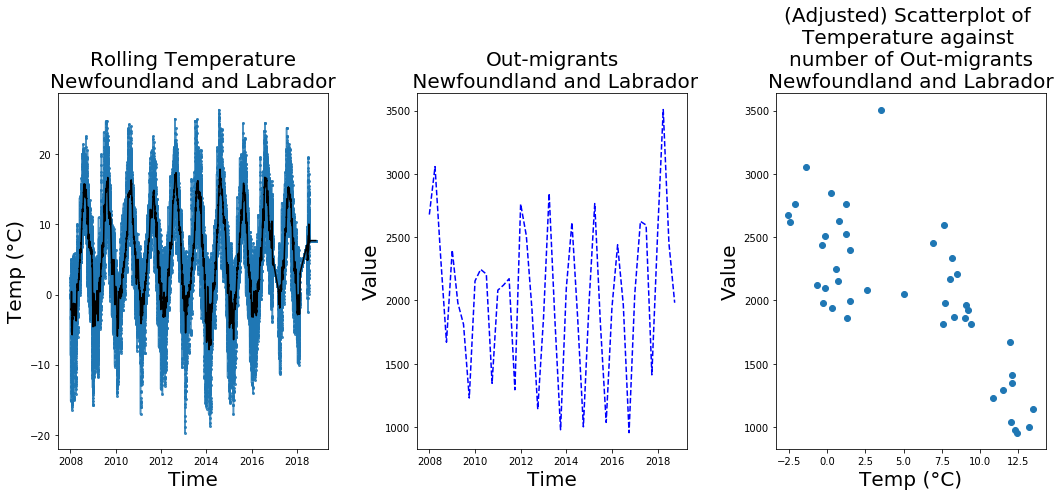

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

if all_the_widgets[2].value=='Canada' or all_the_widgets[2].value=="Northwest Territories including Nunavut":
    f,  a1 = plt.subplots(1,1, gridspec_kw = {'width_ratios':[10]},figsize=(20,5))
   

    a1.plot(df_sub_final["REF_DATE"],df_sub_final["VALUE"],'b--',label='Value')
    a1.set_xlabel('Year-Month', fontsize=20)
    a1.set_ylabel('Value',fontsize=20)
    a1.set_title(str(all_the_widgets[3].value) + ", "+  str(all_the_widgets[2].value),fontsize=20)
    f.tight_layout()


else:
    data_dic[all_the_widgets[2].value]['Temp (°C)'] = data_dic[all_the_widgets[2].value]['Temp (°C)'].interpolate()

    # plot it
    f, (a0, a1,a2) = plt.subplots(1,3, gridspec_kw = {'width_ratios':[10, 10,10]},figsize=(15,7))
    a0.plot(data_dic[all_the_widgets[2].value]['Date/Time'],data_dic[all_the_widgets[2].value]['Temp (°C)'], '-o', alpha=0.8, markersize=2)
    a0.plot(data_dic[all_the_widgets[2].value]['Date/Time'], data_dic[all_the_widgets[2].value]['Temp (°C)'].rolling(window=250,center=False).mean(), 
            '-k', alpha=1.0)
    a0.set_ylabel('Temp (°C)',fontsize=20)
    a0.set_xlabel('Time',fontsize=20)
    a0.set_title("Rolling Temperature" + "\n" + str(all_the_widgets[2].value),fontsize=20)


    a1.plot(df_sub_final["REF_DATE"],df_sub_final["VALUE"],'b--',label='Value')
    a1.set_xlabel('Time', fontsize=20)
    a1.set_ylabel('Value',fontsize=20)
    a1.set_title(str(all_the_widgets[3].value) + "\n "+  str(all_the_widgets[2].value),fontsize=20)
    

    t_index = pd.DatetimeIndex(start='2008-01-01', end='2018-12-31', freq='3M')



    # resample the data to 1 hour, aggregate by counts,
    # then reset the index and fill the na's with 0
    #df2 = df.resample('1h', on='daytime').count().reindex(t_index).fillna(0)
    
    df = data_dic[all_the_widgets[2].value]
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    df = df.set_index('Date/Time')
    # df.drop(['Date'], axis=1, inplace=True)
    df2 = df.resample('3M').mean().reindex(t_index).fillna(0)#.mean()
    a2.scatter(df2['Temp (°C)'],df_sub_final["VALUE"])
    a2.set_xlabel('Temp (°C)', fontsize=20)
    a2.set_ylabel('Value',fontsize=20)
    a2.set_title("(Adjusted) Scatterplot of \nTemperature against \nnumber of " + str(all_the_widgets[3].value)
                 + "\n" + str(all_the_widgets[2].value),fontsize=20)
    f.tight_layout()


In [74]:
import scipy.stats as st
from scipy.stats import linregress
import statsmodels.api as sm


X = df2['Temp (°C)']
y = df_sub_final["VALUE"]

y = list(y)


# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(y) # make the predictions by the model
print("In this case, y denotes the total number of individuals")
# Print out the statistics
print(model.summary())


In this case, y denotes the total number of individuals
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     17.96
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           0.000117
Time:                        22:32:16   Log-Likelihood:                -392.06
No. Observations:                  44   AIC:                             786.1
Df Residuals:                      43   BIC:                             787.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
## rvalue = 0.48, moderate relationship 
## statistically significant
## There are other variables aside from temper

<h2 align='center'>References</h2>

Statistics Canada Table  17-10-0020-01   Estimates of the components of interprovincial migration, quarterly

# ![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)